<a href="https://colab.research.google.com/github/mok3bat/DataDevQuest/blob/main/DDQ2025_05_Convert_Excel_to_Tableau_Hyper_Files_(Beginner).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Libraries
! pip install pandas pantab tableauhyperapi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 MB 7.7 MB/s eta 0:00:00


In [2]:
# import Libraries

'''
The selected code cell imports several Python libraries and modules that are commonly used for data manipulation, particularly when working with large datasets and Tableau Hyper files.

Here's a breakdown of the imports:

itertools: This module implements a number of iterator building blocks inspired by constructs from APL, Haskell, and SML. It provides tools for working with iterators efficiently.
time: This module provides various time-related functions, often used for measuring the execution time of code.
numpy as np: Imports the NumPy library, aliasing it as np. NumPy is fundamental for numerical operations in Python, especially for working with arrays and matrices.
pandas as pd: Imports the pandas library, aliasing it as pd. Pandas is a powerful library for data manipulation and analysis, providing data structures like DataFrames.
pantab as pt: Imports the pantab library, aliasing it as pt. Pantab is a library that allows you to read and write pandas DataFrames to and from Tableau Hyper files.
from tableauhyperapi import ...: This line imports specific components from the tableauhyperapi library. This library is the official Python API for working directly with Tableau Hyper files. The imported components are:
Connection: Used to establish a connection to a Hyper file.
CreateMode: Defines how to handle the creation of a Hyper file (e.g., create if it doesn't exist, replace if it does).
HyperProcess: Manages the Hyper process, which is the engine that interacts with Hyper files.
Inserter: Used to insert data into a table within a Hyper file.
SqlType: Represents SQL data types used in Hyper tables.
TableDefinition: Defines the schema (table name, column names, data types) of a table in a Hyper file.
TableName: Represents the name of a table in a Hyper file.
Telemetry: Used to configure telemetry settings for the Hyper process.
'''

import itertools
import time

import numpy as np
import pandas as pd
import pantab as pt
from tableauhyperapi import (
    Connection,
    CreateMode,
    HyperProcess,
    Inserter,
    SqlType,
    TableDefinition,
    TableName,
    Telemetry,
    Name
)

from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [6]:
excel_path_1 = "https://github.com/nikdutra/DDQ-2025-04/raw/refs/heads/main/datasets/RWFD_Supply_Chain.xlsx"
sheet_name_1 = "OrderList"

df = pd.read_excel(excel_path_1, sheet_name=sheet_name_1)

print(tabulate(df_orders.head(), headers='keys', tablefmt='psql'))

+----+-------------+---------------------+---------------+-----------+-------+-----------------+------------------------+-----------------------+------------+--------------+--------------+--------------------+-----------------+----------+
|    |    Order ID | Order Date          | Origin Port   | Carrier   |   TPT | Service Level   |   Ship ahead day count |   Ship Late Day count | Customer   |   Product ID | Plant Code   | Destination Port   |   Unit quantity |   Weight |
|----+-------------+---------------------+---------------+-----------+-------+-----------------+------------------------+-----------------------+------------+--------------+--------------+--------------------+-----------------+----------|
|  0 | 1.4473e+09  | 2013-05-26 00:00:00 | PORT09        | V44_3     |     1 | CRF             |                      3 |                     0 | V55555_53  |      1700106 | PLANT16      | PORT09             |             808 |    14.3  |
|  1 | 1.44716e+09 | 2013-05-26 00:00:00 | P

In [7]:
# Check the inferred data types
print(df.dtypes)

Order ID                       float64
Order Date              datetime64[ns]
Origin Port                     object
Carrier                         object
TPT                              int64
Service Level                   object
Ship ahead day count             int64
Ship Late Day count              int64
Customer                        object
Product ID                       int64
Plant Code                      object
Destination Port                object
Unit quantity                    int64
Weight                         float64
dtype: object


**All types looks fine for me. Except for Order ID, Product ID which should be Int**

In [8]:
# Change column datatype
convert_dict = {'Product ID': int, 'Order ID': int}

df = df.astype(convert_dict)
print(df.dtypes)

Order ID                         int64
Order Date              datetime64[ns]
Origin Port                     object
Carrier                         object
TPT                              int64
Service Level                   object
Ship ahead day count             int64
Ship Late Day count              int64
Customer                        object
Product ID                       int64
Plant Code                      object
Destination Port                object
Unit quantity                    int64
Weight                         float64
dtype: object


In [9]:
#Let's get some info about the imported dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              599 non-null    int64         
 1   Order Date            599 non-null    datetime64[ns]
 2   Origin Port           599 non-null    object        
 3   Carrier               599 non-null    object        
 4   TPT                   599 non-null    int64         
 5   Service Level         599 non-null    object        
 6   Ship ahead day count  599 non-null    int64         
 7   Ship Late Day count   599 non-null    int64         
 8   Customer              599 non-null    object        
 9   Product ID            599 non-null    int64         
 10  Plant Code            599 non-null    object        
 11  Destination Port      599 non-null    object        
 12  Unit quantity         599 non-null    int64         
 13  Weight              

In [10]:
# Writing a datframe as a hyper file

'''
The function accept dataframe as input and write it to a hyper file.
'''

def write_via_pantab(df: pd.DataFrame, db_name="Extract_PanTab", schema="Public", table_name="Extract"):
  # Let's write somewhere besides the default public schema
  table = TableName(schema, table_name)
  pt.frame_to_hyper(df, db_name+".hyper", table=table)

### 📚 Mapping Pandas dtypes → Tableau Hyper SqlType

In [11]:
# Define a mapping from pandas dtypes to Tableau SqlTypes
pandas_to_hyper_type = {
    "int64": SqlType.int(),            # Integer
    "int32": SqlType.int(),
    "float64": SqlType.double(),       # Float
    "float32": SqlType.double(),
    "bool": SqlType.bool(),            # Boolean
    "object": SqlType.text(),          # String/Text
    "string": SqlType.text(),
    "datetime64[ns]": SqlType.timestamp(),  # Datetime
    "timedelta[ns]": SqlType.interval(),    # Optional
    "category": SqlType.text(),        # Fallback to text
    "UInt8": SqlType.int(),            # Unsigned fallback
    "Int8": SqlType.int(),
    "Int16": SqlType.int(),
    "UInt16": SqlType.int(),
    "UInt32": SqlType.int(),
    "UInt64": SqlType.int()
}

### 🛠️ Function to Generate Hyper Schema from DataFrame

In [12]:
def infer_hyper_schema(df, table_name="Extract"):
    column_definitions = []

    for col in df.columns:
        dtype_str = str(df[col].dtype)
        hyper_type = pandas_to_hyper_type.get(dtype_str, SqlType.text())  # default to text
        column=TableDefinition.Column(name=col, type=hyper_type)
        column_definitions.append(column)

    return TableDefinition(table_name=table_name, columns=column_definitions)

In [13]:
infer_hyper_schema(df, table_name="Extract")

TableDefinition(TableName('Extract'), [Column('Order ID', SqlType.int(), Nullability.NULLABLE), Column('Order Date', SqlType.timestamp(), Nullability.NULLABLE), Column('Origin Port', SqlType.text(), Nullability.NULLABLE), Column('Carrier', SqlType.text(), Nullability.NULLABLE), Column('TPT', SqlType.int(), Nullability.NULLABLE), Column('Service Level', SqlType.text(), Nullability.NULLABLE), Column('Ship ahead day count', SqlType.int(), Nullability.NULLABLE), Column('Ship Late Day count', SqlType.int(), Nullability.NULLABLE), Column('Customer', SqlType.text(), Nullability.NULLABLE), Column('Product ID', SqlType.int(), Nullability.NULLABLE), Column('Plant Code', SqlType.text(), Nullability.NULLABLE), Column('Destination Port', SqlType.text(), Nullability.NULLABLE), Column('Unit quantity', SqlType.int(), Nullability.NULLABLE), Column('Weight', SqlType.double(), Nullability.NULLABLE)], Persistence.PERMANENT)

## Since pandas treats spatial data as object dtype (e.g., WKT strings), you'll need to:

*   Decide based on column name convention (like geometry, wkt, etc.)
*   Or inspect sample values to detect WKT strings (e.g., "POINT(30 10)", "POLYGON((...))")


### 🧠 Update the Mapping Function

In [18]:
'''
This function will handle spatial columns
User will define which column is including spatial info.

Example
df = pd.DataFrame({
    "location": ["POINT(30 10)", "POINT(40 20)", "POINT(50 30)"],
    "city": ["Cairo", "Dubai", "Riyadh"]
})

schema = infer_hyper_schema_with_spatial(df, spatial_columns=["location"])
print(schema)

'''

def infer_hyper_schema_with_spatial(df, schema="Extract", table_name="Extract", spatial_columns=None):

    spatial_columns = spatial_columns or []

    column_definitions = []

    for col in df.columns:
        if col in spatial_columns:
            hyper_type = SqlType.geography()
        else:
            dtype_str = str(df[col].dtype)
            hyper_type = pandas_to_hyper_type.get(dtype_str, SqlType.text())  # default to text

        column=TableDefinition.Column(name=col, type=hyper_type)
        column_definitions.append(column)


    return TableDefinition(table_name=TableName(schema, table_name), columns=column_definitions)

In [16]:
# Write rows using hyper api

def write_via_hyperapi(df: pd.DataFrame, db_name="Extract_API", schema="Extract", table_name="Extract", spatial_columns=None):
    with HyperProcess(telemetry=Telemetry.DO_NOT_SEND_USAGE_DATA_TO_TABLEAU) as hyper:
        table = infer_hyper_schema_with_spatial(df, schema=schema, table_name=table_name, spatial_columns=spatial_columns)
        with Connection(
            endpoint=hyper.endpoint,
            database=db_name+".hyper",
            create_mode=CreateMode.CREATE_AND_REPLACE,
        ) as conn:
            conn.catalog.create_schema(schema=table.table_name.schema_name)
            # print(table.table_name.schema_name)
            conn.catalog.create_table(table_definition=table)
            with Inserter(conn, table) as inserter:
              inserter.add_rows(rows=df.to_numpy().tolist())
              inserter.execute()

In [19]:

funcs = {
    "pantab": write_via_pantab,
    "hyperapi": write_via_hyperapi
}


# Sizes to test (multiples of the original DataFrame)
scales = [1,17, 167, 1669, 16695]

results = []

for scale in scales:
    df_scaled = df.loc[df.index.repeat(scale)].reset_index(drop=True)
    print(f"\n🔢 Testing with {len(df_scaled)} rows")
    for name, func in funcs.items():
        start_time = time.time()
        func(df_scaled)
        elapsed = time.time() - start_time
        print(f"{name:<10} ➤ {elapsed:.3f} seconds")
        results.append({
            "Function": name,
            "Rows": len(df_scaled),
            "Time (s)": round(elapsed, 3)
        })

# Optional: Convert to DataFrame for export or plotting
results_df = pd.DataFrame(results)
print("\n📊 Summary:")
print(results_df)



🔢 Testing with 599 rows
pantab     ➤ 0.102 seconds
hyperapi   ➤ 0.106 seconds

🔢 Testing with 10183 rows
pantab     ➤ 0.130 seconds
hyperapi   ➤ 0.267 seconds

🔢 Testing with 100033 rows
pantab     ➤ 0.405 seconds
hyperapi   ➤ 2.197 seconds

🔢 Testing with 999731 rows
pantab     ➤ 2.128 seconds
hyperapi   ➤ 20.446 seconds

🔢 Testing with 10000305 rows
pantab     ➤ 22.698 seconds
hyperapi   ➤ 186.138 seconds

📊 Summary:
   Function      Rows  Time (s)
0    pantab       599     0.102
1  hyperapi       599     0.106
2    pantab     10183     0.130
3  hyperapi     10183     0.267
4    pantab    100033     0.405
5  hyperapi    100033     2.197
6    pantab    999731     2.128
7  hyperapi    999731    20.446
8    pantab  10000305    22.698
9  hyperapi  10000305   186.138


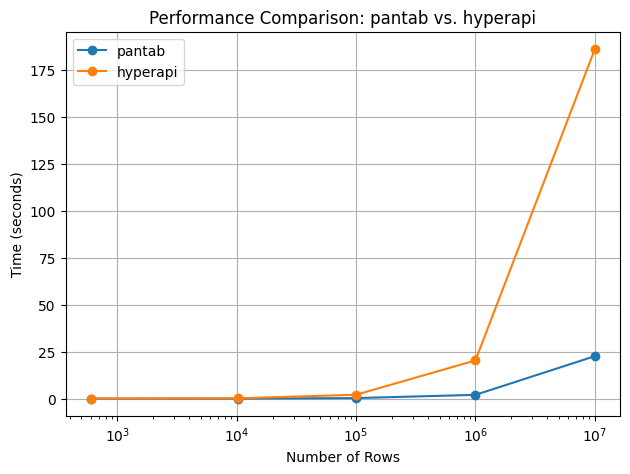

In [20]:
# Extract unique function names
funcs = results_df["Function"].unique()

# Get X axis values (row counts)
xvals = sorted(results_df["Rows"].unique())

# Build time values for each function
time_series = {
    func: results_df[results_df["Function"] == func].sort_values("Rows")["Time (s)"].values
    for func in funcs
}


for func in funcs:
    plt.plot(xvals, time_series[func], marker="o", label=func)

plt.xlabel("Number of Rows")
plt.ylabel("Time (seconds)")
plt.title("Performance Comparison: pantab vs. hyperapi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xscale("log")
plt.show()

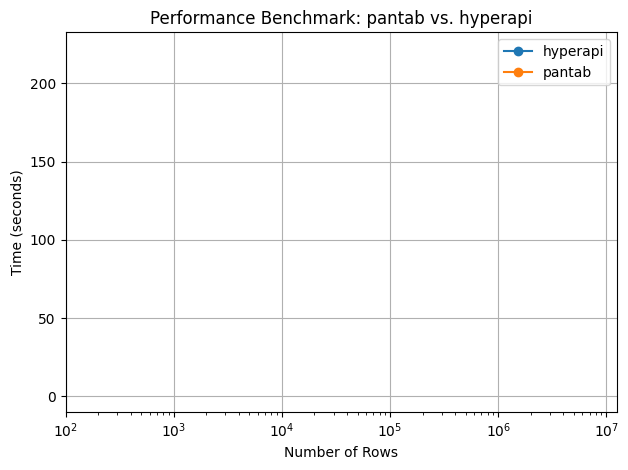

In [23]:
# Sort values for proper animation
results_df = results_df.sort_values(by=["Function", "Rows"])

# Grouped data for animation
funcs = results_df["Function"].unique()
grouped = {func: df.sort_values("Rows") for func, df in results_df.groupby("Function")}

# Set up plot
fig, ax = plt.subplots()
lines = {func: ax.plot([], [], marker='o', label=func)[0] for func in funcs}
ax.set_xscale('log')
ax.set_xlim(100, results_df["Rows"].max() * 1.25)
ax.set_ylim(-10, results_df["Time (s)"].max() * 1.25)
ax.set_xlabel("Number of Rows")
ax.set_ylabel("Time (seconds)")
ax.set_title("Performance Benchmark: pantab vs. hyperapi")
ax.legend()
ax.grid(True)
#ax.set_xscale('log')

# Animation data prep
max_len = max(len(grouped[func]) for func in funcs)

def update(frame):
    for func in funcs:
        data = grouped[func]
        if frame < len(data):
            lines[func].set_data(data["Rows"].iloc[:frame+1], data["Time (s)"].iloc[:frame+1])
    return lines.values()

ani = FuncAnimation(fig, update, frames=max_len, interval=600, blit=False, repeat=False)

# Show animation live
plt.tight_layout()
plt.show()

# Optional: Save to file (uncomment one)
ani.save("benchmark_plot.mp4", fps=1, dpi=150)
ani.save("benchmark_plot.gif", writer="pillow", fps=1)


In [22]:
# Print summary statistics

# Reshape data for easier plotting
pantab_data = results_df[results_df['Function'] == 'pantab'].reset_index(drop=True)
hyperapi_data = results_df[results_df['Function'] == 'hyperapi'].reset_index(drop=True)

print("\n" + "="*50)
print("PERFORMANCE ANALYSIS SUMMARY")
print("="*50)
for i, rows in enumerate(pantab_data['Rows']):
    pantab_time = pantab_data['Time (s)'].iloc[i]
    hyperapi_time = hyperapi_data['Time (s)'].iloc[i]
    speedup = hyperapi_time / pantab_time
    print(f"Dataset: {rows:,} rows")
    print(f"  pantab:   {pantab_time:.2f}s")
    print(f"  hyperapi: {hyperapi_time:.2f}s")
    print(f"  Speedup:  {speedup:.1f}x faster with pantab")
    print("-" * 30)

avg_speedup = np.mean([hyperapi_data['Time (s)'].iloc[i] / pantab_data['Time (s)'].iloc[i]
                      for i in range(len(pantab_data))])
print(f"Average speedup: {avg_speedup:.1f}x faster with pantab")


PERFORMANCE ANALYSIS SUMMARY
Dataset: 599 rows
  pantab:   0.10s
  hyperapi: 0.11s
  Speedup:  1.0x faster with pantab
------------------------------
Dataset: 10,183 rows
  pantab:   0.13s
  hyperapi: 0.27s
  Speedup:  2.1x faster with pantab
------------------------------
Dataset: 100,033 rows
  pantab:   0.41s
  hyperapi: 2.20s
  Speedup:  5.4x faster with pantab
------------------------------
Dataset: 999,731 rows
  pantab:   2.13s
  hyperapi: 20.45s
  Speedup:  9.6x faster with pantab
------------------------------
Dataset: 10,000,305 rows
  pantab:   22.70s
  hyperapi: 186.14s
  Speedup:  8.2x faster with pantab
------------------------------
Average speedup: 5.3x faster with pantab
